In [44]:
import pandas as pd
import numpy as np

#import geopandas as gpd


#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt


**Saving the data into a dataframe**

In [45]:
df_house = pd.read_csv("data/eda.csv")

df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


**Exploring the data**

In [46]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [47]:
# import missingno
import missingno as msno

In [48]:
# display number of missing values per column
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

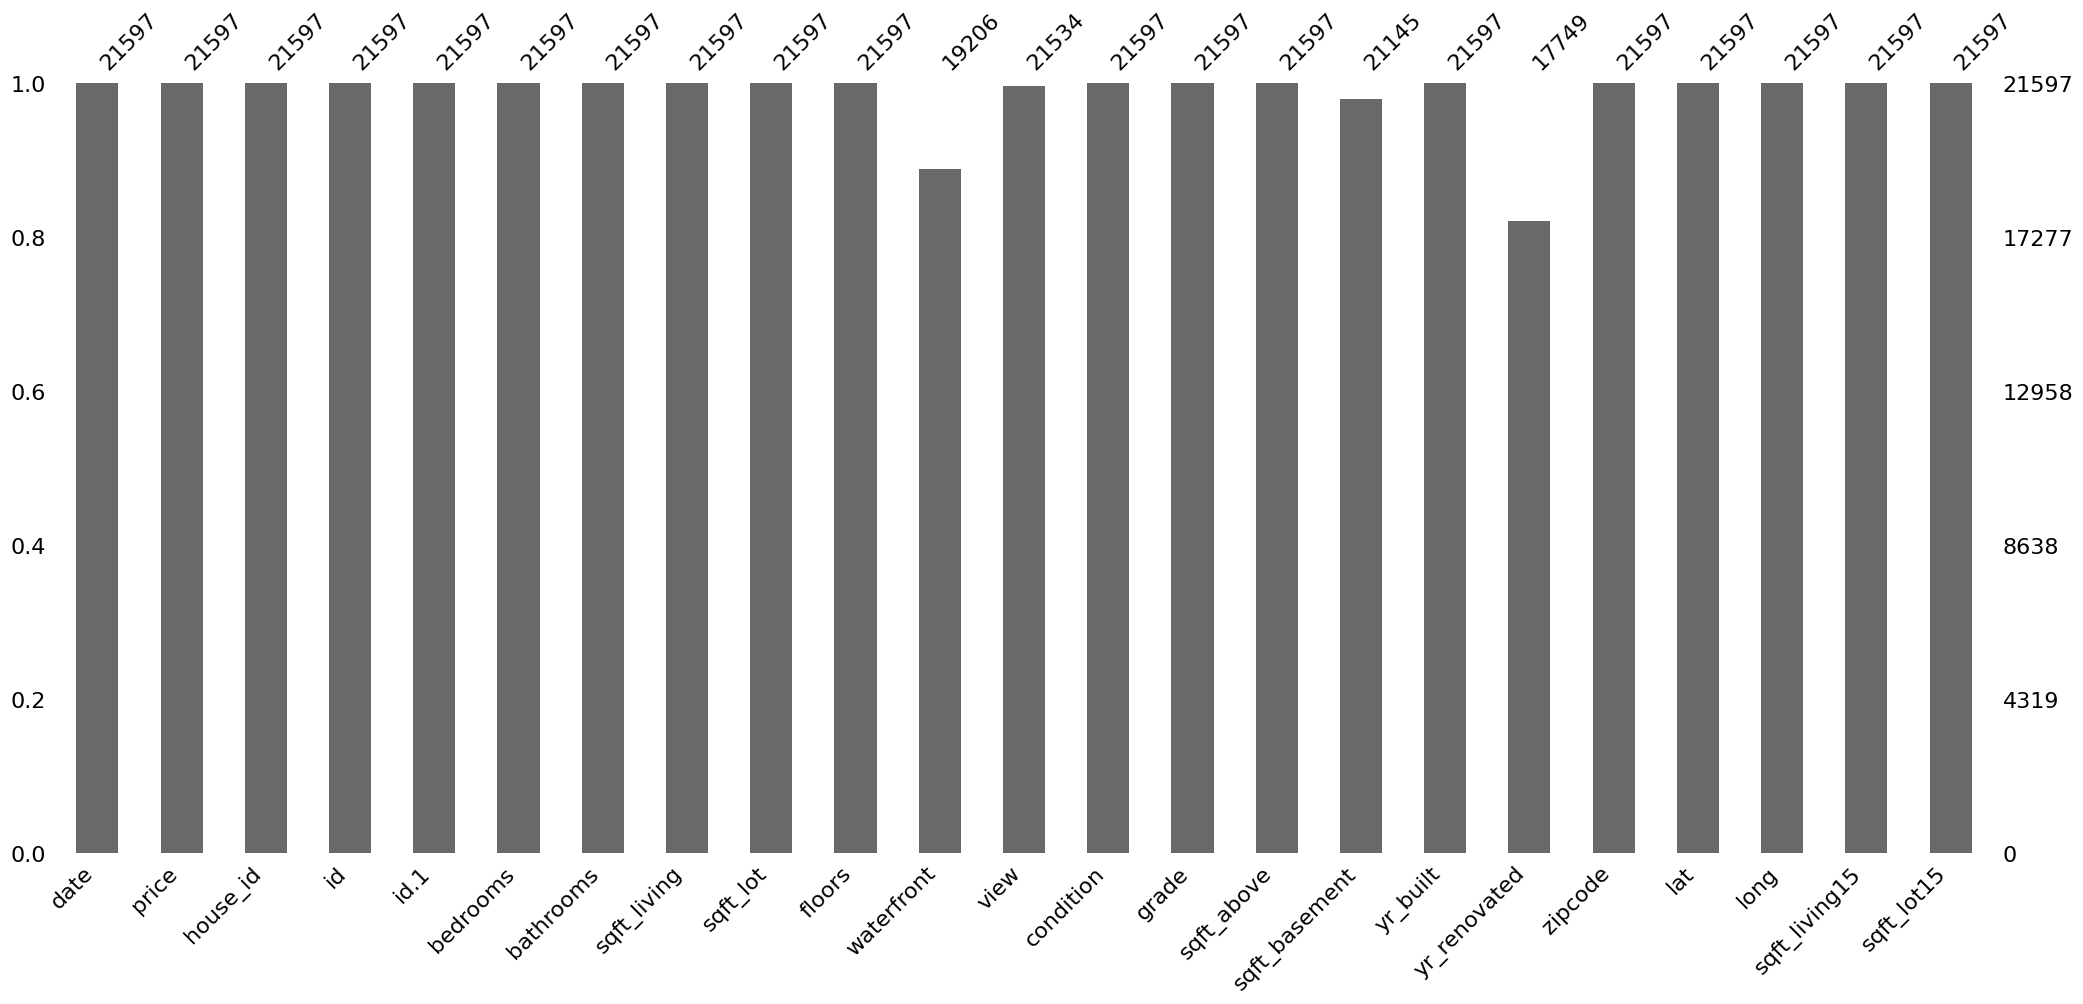

In [49]:
# plotting percentage of missing values per column
msno.bar(df_house)

<Axes: >

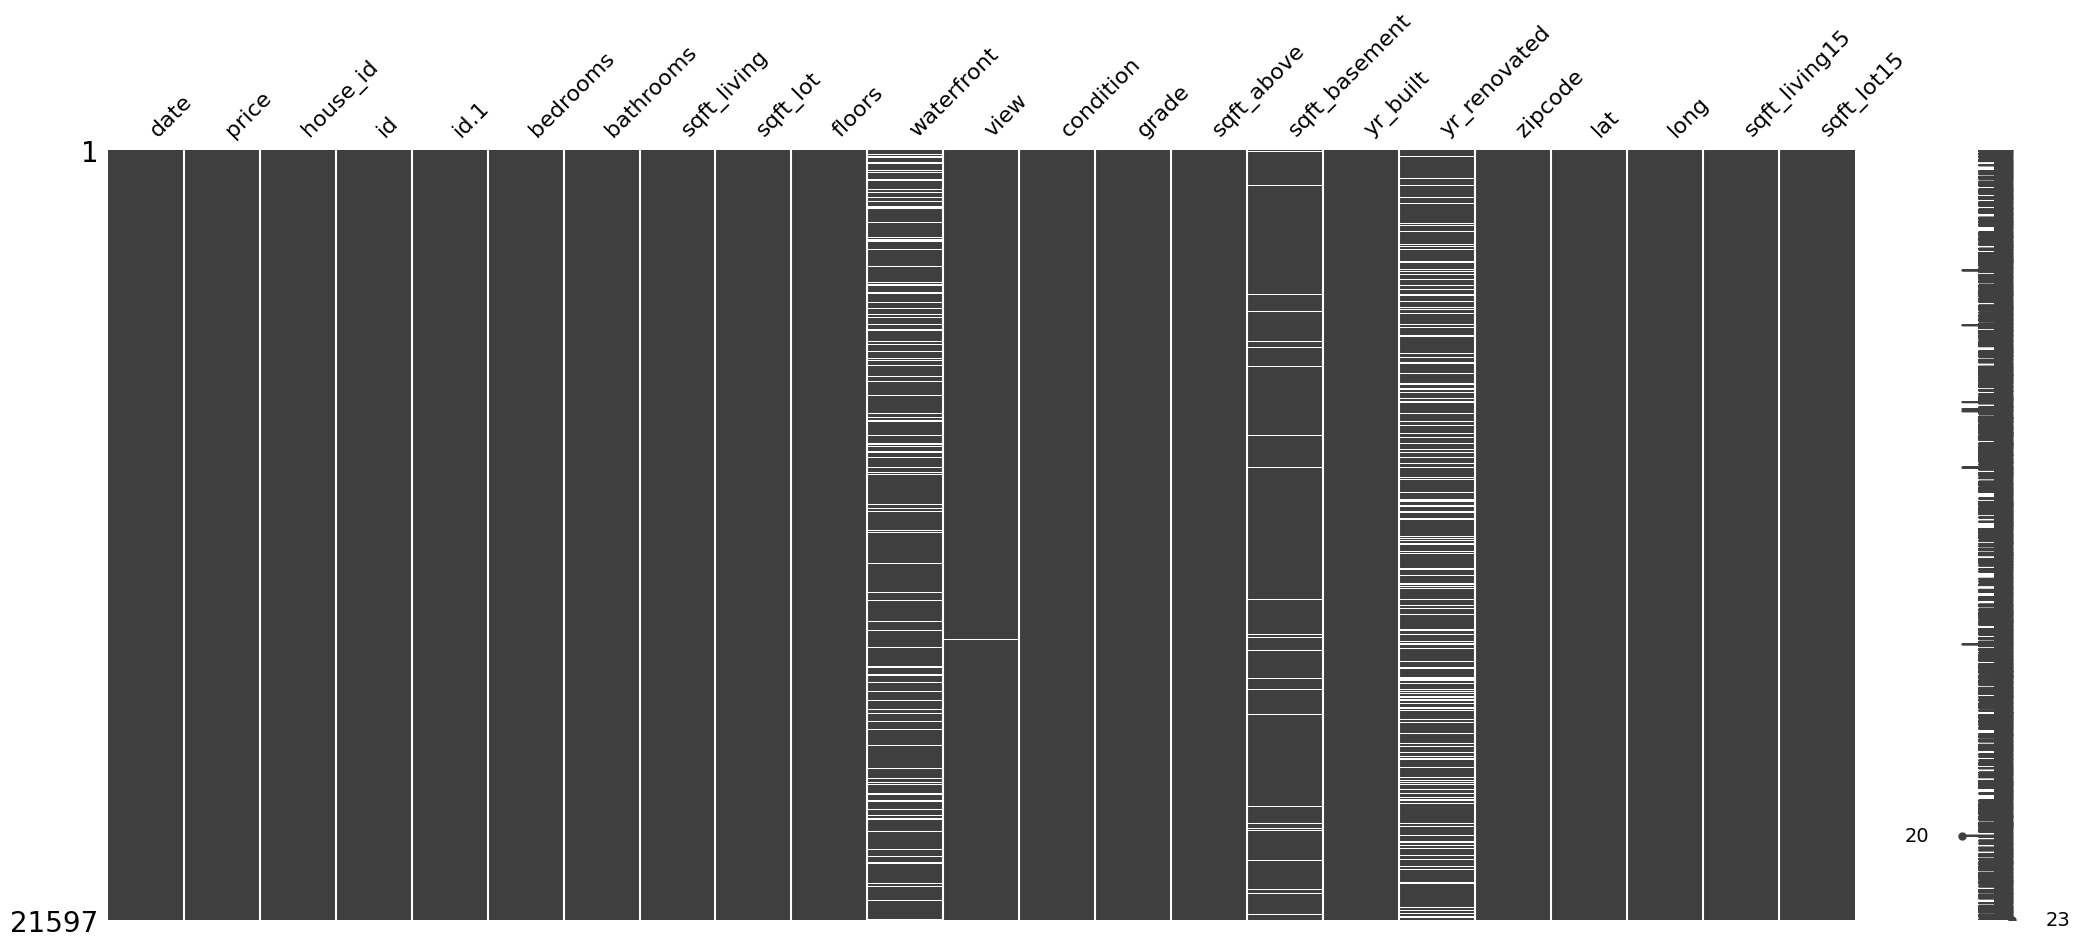

In [50]:
msno.matrix(df_house)

In [51]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
df_house.columns = df_house.columns.str.replace('.','_')
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [53]:
# renaming column
df_house = df_house.rename({'lat':'latitude','long':'longitude',
                            'sqft_living15':'living_space_15_neighbours', 'sqft_lot15':'plotsize_15_neighbours',
                            'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft',
                            'view':'num_potential_buyers'}, axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront',
       'num_potential_buyers', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'latitude',
       'longitude', 'living_space_15_neighbours', 'plotsize_15_neighbours'],
      dtype='object')

In [54]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [55]:
df_house.dtypes

date                           object
price                         float64
house_id                        int64
id                              int64
id_1                            int64
bedrooms                      float64
bathrooms                     float64
livingspace_sqft              float64
plotsize_sqft                 float64
floors                        float64
waterfront                    float64
num_potential_buyers          float64
condition                       int64
grade                           int64
sqft_above                    float64
sqft_basement                 float64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
latitude                      float64
longitude                     float64
living_space_15_neighbours    float64
plotsize_15_neighbours        float64
dtype: object

In [56]:
# Convert date to datetime format 
df_house.date = pd.to_datetime(df_house.date)
print(df_house['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]


In [57]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


In [58]:
#plt.bar(df_house.zipcode,df_house.price)

In [59]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 0, 'Prices')

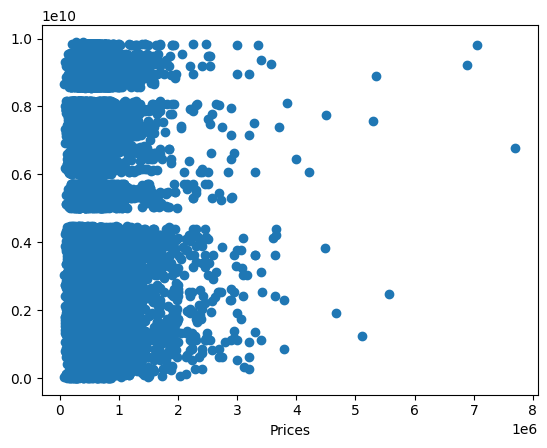

In [60]:
plt.scatter(df_house.price, df_house.house_id)
plt.xlabel('Prices')

In [61]:
type(df_house.yr_renovated[3])
df_house.yr_renovated.head()

0        0.0
1    19910.0
2        NaN
3        0.0
4        0.0
Name: yr_renovated, dtype: float64

In [62]:
df_house.dtypes
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


In [63]:
# Use fillna to impute missing values
df_house["waterfront"] = df_house.waterfront.fillna(0)

# Replace missing values in "sqft_basement" with values from "sqft_living"
df_house['sqft_basement'].fillna(df_house['livingspace_sqft'], inplace=True)

# turn yr_built and yr_renovated into year datetime
df_house['yr_renovated'] = df_house['yr_renovated'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated).dt.strftime('%Y')
df_house["yr_renovated"] = df_house.yr_renovated.fillna(0)

df_house['yr_built'] = df_house['yr_built'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_built'] = pd.to_datetime(df_house.yr_built).dt.strftime('%Y')

# Fill potential_buyers with 0
df_house["num_potential_buyers"] = df_house.num_potential_buyers.fillna(0)

In [64]:
# Rounding bathrooms and floors
df_house['bathrooms'] = df_house.bathrooms.round()
df_house['floors'] = df_house.floors.round()


In [65]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.0,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.0,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.0,770.0,10000.0,1.0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.0,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.0,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [66]:
print(df_house.dtypes)

date                          datetime64[ns]
price                                float64
house_id                               int64
id                                     int64
id_1                                   int64
bedrooms                             float64
bathrooms                            float64
livingspace_sqft                     float64
plotsize_sqft                        float64
floors                               float64
waterfront                           float64
num_potential_buyers                 float64
condition                              int64
grade                                  int64
sqft_above                           float64
sqft_basement                        float64
yr_built                              object
yr_renovated                          object
zipcode                                int64
latitude                             float64
longitude                            float64
living_space_15_neighbours           float64
plotsize_1

In [67]:
df_house.tail()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
21592,2014-05-21,360000.0,263000018,21593,263000018,3.0,2.0,1530.0,1131.0,3.0,...,8,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21593,2015-02-23,400000.0,6600060120,21594,6600060120,4.0,2.0,2310.0,5813.0,2.0,...,8,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21594,2014-06-23,402101.0,1523300141,21595,1523300141,2.0,1.0,1020.0,1350.0,2.0,...,7,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21595,2015-01-16,400000.0,291310100,21596,291310100,3.0,2.0,1600.0,2388.0,2.0,...,8,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0
21596,2014-10-15,325000.0,1523300157,21597,1523300157,2.0,1.0,1020.0,1076.0,2.0,...,7,1020.0,0.0,2008,0,98144,47.5941,-122.299,1020.0,1357.0


<Axes: >

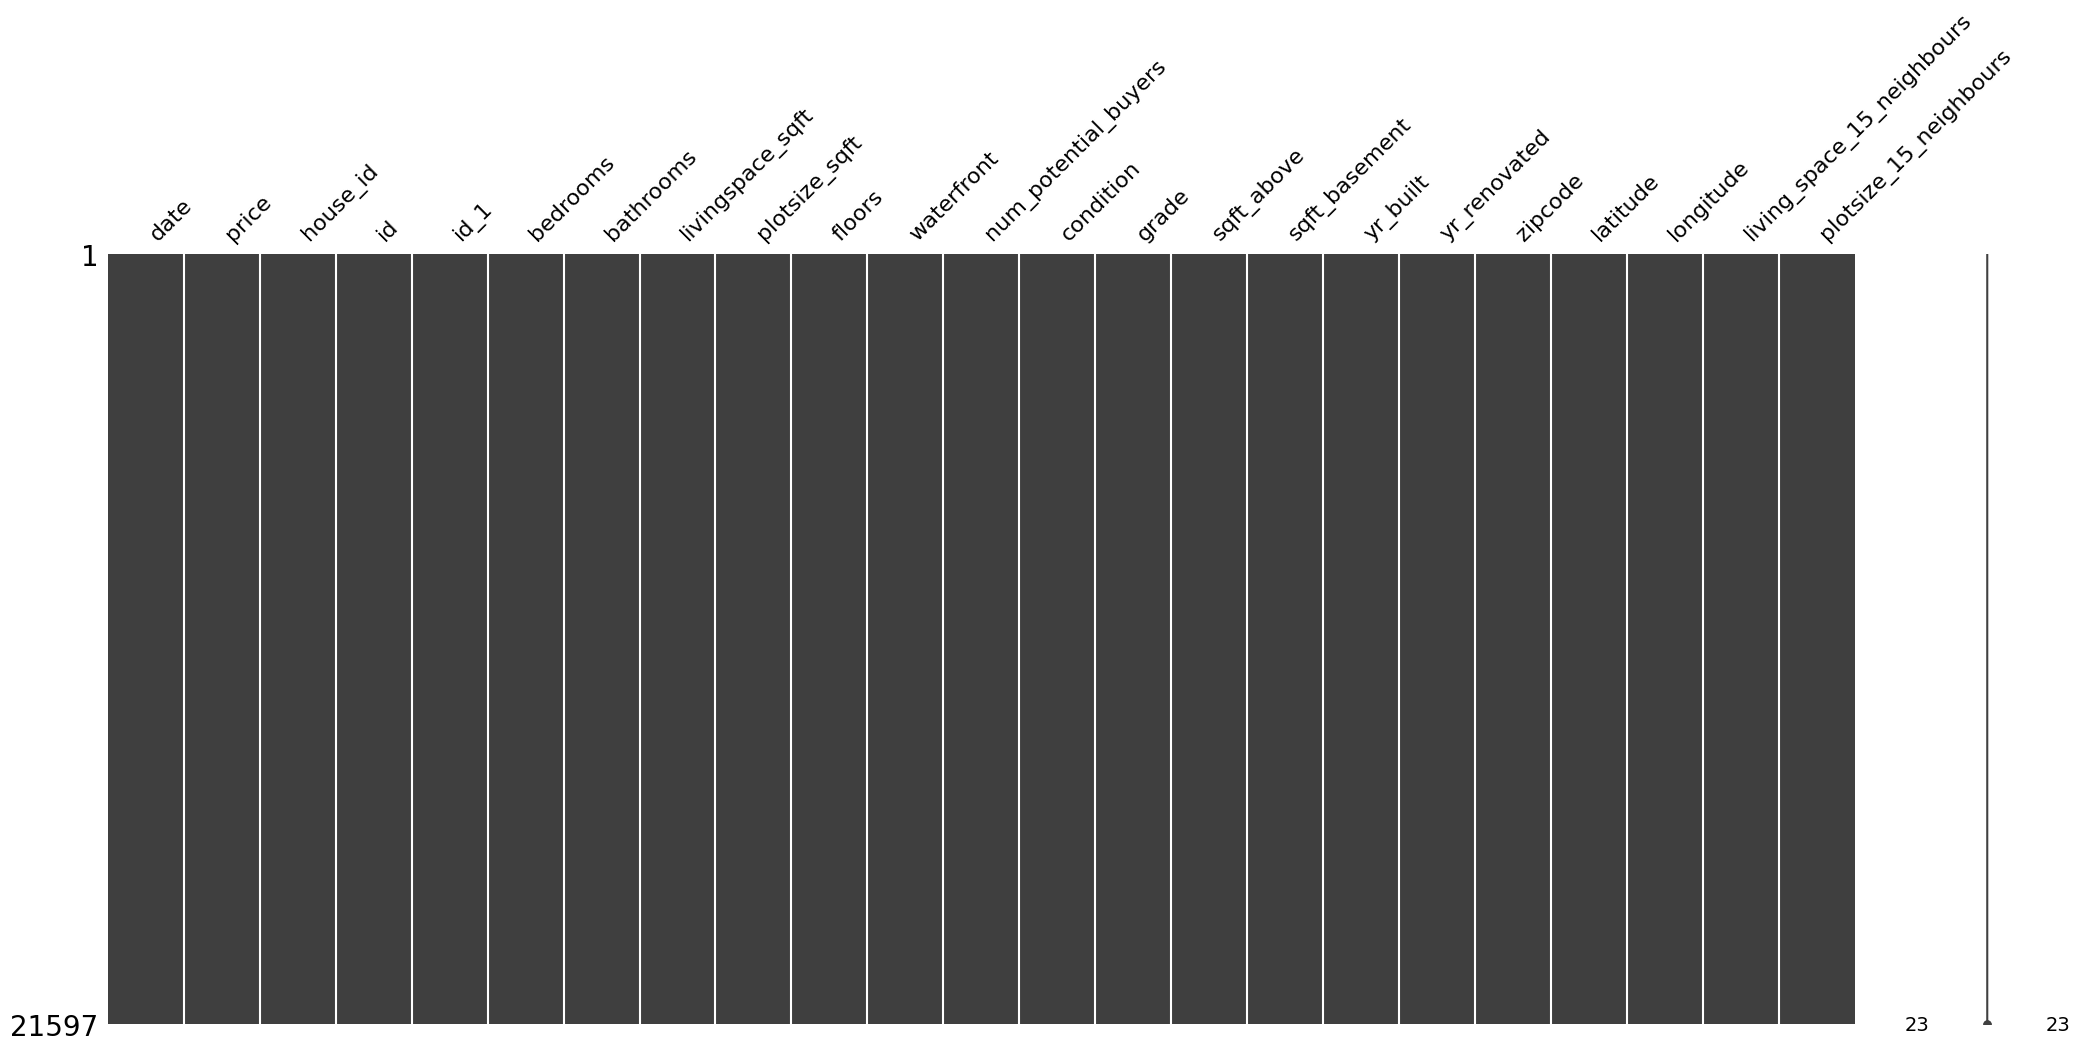

In [68]:
msno.matrix(df_house)

# Visualising Data

In [69]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        21597 non-null  datetime64[ns]
 1   price                       21597 non-null  float64       
 2   house_id                    21597 non-null  int64         
 3   id                          21597 non-null  int64         
 4   id_1                        21597 non-null  int64         
 5   bedrooms                    21597 non-null  float64       
 6   bathrooms                   21597 non-null  float64       
 7   livingspace_sqft            21597 non-null  float64       
 8   plotsize_sqft               21597 non-null  float64       
 9   floors                      21597 non-null  float64       
 10  waterfront                  21597 non-null  float64       
 11  num_potential_buyers        21597 non-null  float64   

In [75]:
#price per sqft
df_house['price_per_sqft'] = df_house['price'] / df_house['livingspace_sqft']
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,price_per_sqft
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.0,1180.0,5650.0,1.0,...,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,188.050847
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.0,2570.0,7242.0,2.0,...,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,209.338521
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.0,770.0,10000.0,1.0,...,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0,233.766234
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.0,1960.0,5000.0,1.0,...,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,308.163265
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.0,1680.0,8080.0,1.0,...,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,303.571429


In [79]:
# Grouping by multiple columns and aggregating statistics
grouped_data = df_house.groupby(['grade', 'condition', 'zipcode']).agg({
    'price_per_sqft': 'median',  # Calculate the median price per sqft within each group
    'price': 'mean',  # Calculate the mean price within each group
    'livingspace_sqft': 'mean',  # Calculate the mean living space area within each group
    'plotsize_sqft': 'mean'  # Calculate the mean plot size within each group
}).reset_index()  # Reset index to get a DataFrame instead of a grouped Series

# Display the grouped data
print(grouped_data.tail(500))


      grade  condition  zipcode  price_per_sqft         price  \
703       8          4    98072      247.422680  5.709965e+05   
704       8          4    98074      234.508688  5.861237e+05   
705       8          4    98075      256.067103  7.542382e+05   
706       8          4    98077      230.000000  5.874550e+05   
707       8          4    98092      154.723627  3.565543e+05   
...     ...        ...      ...             ...           ...   
1198     13          3    98102      364.170338  2.480000e+06   
1199     13          3    98177      333.333333  3.036667e+06   
1200     13          3    98199      450.704225  3.200000e+06   
1201     13          4    98004      539.007092  3.800000e+06   
1202     13          4    98102      639.004149  7.700000e+06   

      livingspace_sqft  plotsize_sqft  
703        2225.161290   37281.612903  
704        2371.666667   16996.000000  
705        2622.916667   35314.291667  
706        2551.333333   46303.866667  
707        2325.000

In [82]:
import plotly.express as px

# Scatter plot for price per sqft vs. living space area, color-coded by price
scatter_fig = px.scatter(
    grouped_data,
    x='livingspace_sqft',
    y='price_per_sqft',
    color='price',
    size='plotsize_sqft',
    hover_name='zipcode',
    title="Price per Sqft vs. Living Space Area"
)
scatter_fig.show()

# Choropleth map for median price per sqft by zip code
choropleth_fig = px.choropleth_mapbox(
    grouped_data,
    geojson=url_geojson,
    locations='zipcode',
    featureidkey='properties.ZCTA5CE10',
    color='price_per_sqft',
    hover_name='zipcode',
    mapbox_style="carto-positron",
    zoom=8,
    center={"lat": avg_latitude, "lon": avg_longitude},
    opacity=0.5,
    title="Median Price per Sqft by Zip Code"
)
choropleth_fig.update_layout(mapbox_style="open-street-map")
choropleth_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
choropleth_fig.show()


## Visualising with focus on house condition and grade

In [87]:
import plotly.express as px

# Scatter plot for house grade vs. house condition, color-coded by price_per_sqft
scatter_fig = px.scatter(
    grouped_data,
    x='grade',
    y='condition',
    color='price_per_sqft',
    color_continuous_scale='Viridis',
    size='price_per_sqft',
    hover_name='zipcode',
    title="Correlation between House Grade, Condition, and Price per Sqft"
)
scatter_fig.show()

# Choropleth map for median price per sqft by zip code
choropleth_fig = px.choropleth_mapbox(
    grouped_data,
    geojson=url_geojson,
    locations='zipcode',
    featureidkey='properties.ZCTA5CE10',
    color='price_per_sqft',
    color_continuous_scale='Viridis',
    hover_name='zipcode',
    mapbox_style="carto-positron",
    zoom=8,
    center={"lat": avg_latitude, "lon": avg_longitude},
    opacity=0.5,
    title="Median Price per Sqft by Zip Code"
)
choropleth_fig.update_layout(mapbox_style="open-street-map")
choropleth_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
choropleth_fig.show()


In [88]:
import plotly.express as px

# Scatter plot for average price per sqft by house grade, house condition, and zipcode
scatter_fig = px.scatter(
    grouped_data,
    x='grade',
    y='condition',
    color='price_per_sqft',
    size='price_per_sqft',
    hover_name='zipcode',
    title="Median Price per Sqft by House Grade, Condition, and Zipcode",
    labels={'grade': 'House Grade', 'condition': 'House Condition', 'price_per_sqft': 'Avg Price per Sqft'}
)
scatter_fig.show()
